In [2]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import numpy as np
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

np.warnings.filterwarnings('ignore')

/Users/azmirfakkri/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# read data and set date as index
coins = pd.read_csv("https://raw.githubusercontent.com/azmirfakkri/datascience-projects/master/coins.csv", index_col = 'Date')
coins.index = pd.to_datetime(coins.index)

In [3]:
# view data
coins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2298 entries, 2011-12-18 to 2018-04-02
Data columns (total 21 columns):
BTC_weighted_price    2298 non-null float64
BTC_volume            2298 non-null float64
BTC_open              2298 non-null float64
BTC_high              2298 non-null float64
BTC_low               2298 non-null float64
BTC_close             2298 non-null float64
BTC_pcnt_change       2298 non-null float64
ETH_weighted_price    967 non-null float64
ETH_volume            967 non-null float64
ETH_open              967 non-null float64
ETH_high              967 non-null float64
ETH_low               967 non-null float64
ETH_close             967 non-null float64
ETH_pcnt_change       967 non-null float64
LTC_weighted_price    1534 non-null float64
LTC_volume            1534 non-null float64
LTC_open              1534 non-null float64
LTC_high              1534 non-null float64
LTC_low               1534 non-null float64
LTC_close             1534 non-null float64
LT

In [4]:
coins.head()

,BTC_weighted_price,BTC_volume,BTC_open,BTC_high,BTC_low,BTC_close,BTC_pcnt_change,ETH_weighted_price,ETH_volume,ETH_open,...,ETH_low,ETH_close,ETH_pcnt_change,LTC_weighted_price,LTC_volume,LTC_open,LTC_high,LTC_low,LTC_close,LTC_pcnt_change
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-18,3.397929,17.242857,3.25,3.50,3.25,3.50,7.692308,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-19,3.809668,134.734292,3.50,3.98,3.50,3.85,10.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-20,4.570030,94.743353,4.75,4.75,4.53,4.55,-4.210526,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-21,4.380000,20.899543,4.38,4.38,4.38,4.38,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-22,4.183819,8.535264,4.19,4.19,4.17,4.17,-0.477327,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
coins.tail()

,BTC_weighted_price,BTC_volume,BTC_open,BTC_high,BTC_low,BTC_close,BTC_pcnt_change,ETH_weighted_price,ETH_volume,ETH_open,...,ETH_low,ETH_close,ETH_pcnt_change,LTC_weighted_price,LTC_volume,LTC_open,LTC_high,LTC_low,LTC_close,LTC_pcnt_change
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-29,7393.662244,18800.765218,7937.9825,7965.6525,6908.8825,7083.5775,-10.763503,405.560119,2009.831597,445.360667,...,373.079655,397.424257,-39.066720,119.422876,633.680331,131.158174,132.827176,108.221634,117.040959,-25.533675
2018-03-30,6853.650658,21038.244501,7083.5475,7272.9000,6573.1550,6836.7850,-3.483601,382.081429,1960.136742,383.384329,...,354.950370,370.028750,20.856651,116.328932,572.957198,114.328244,127.412408,105.306281,110.345505,23.302294
2018-03-31,7015.388928,9711.673982,6834.6925,7210.5350,6787.1200,6923.3450,1.297096,404.366948,1698.781288,393.165686,...,381.945449,398.265421,1.505466,120.131310,296.715521,118.240180,126.259640,113.350198,119.773869,4.191091
2018-04-01,6723.150013,12563.251560,6922.6375,7041.3075,6443.2525,6816.7225,-1.529980,376.030150,857.359178,393.655781,...,355.056975,387.632925,-3.890132,113.210652,231.868108,116.013090,120.361223,107.175773,114.238112,1.060124
2018-04-02,6983.244596,9715.367287,6816.3875,7114.6450,6768.2875,7034.9300,3.206134,383.157991,1246.024291,378.105015,...,361.561918,390.227567,5.244628,118.527588,186.402643,115.029538,122.158312,112.691581,118.717539,-0.041032


# Plotting Time Series

1. Bitcoin, Ethereum and Litecoin Weighted Price
2. Bitcoin Weighted Price
3. Ethereum Weighted Price
4. Litecoin Weighted Price

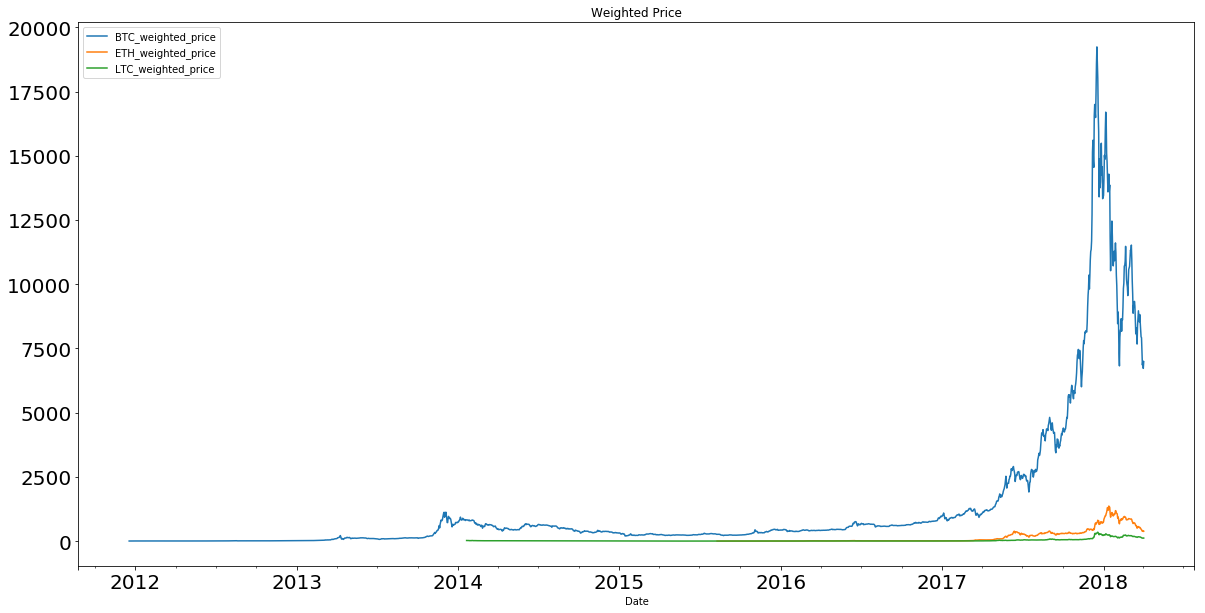

In [6]:
coins.filter(regex = "weighted_price").plot(figsize=(20,10), fontsize=20, title='Weighted Price')

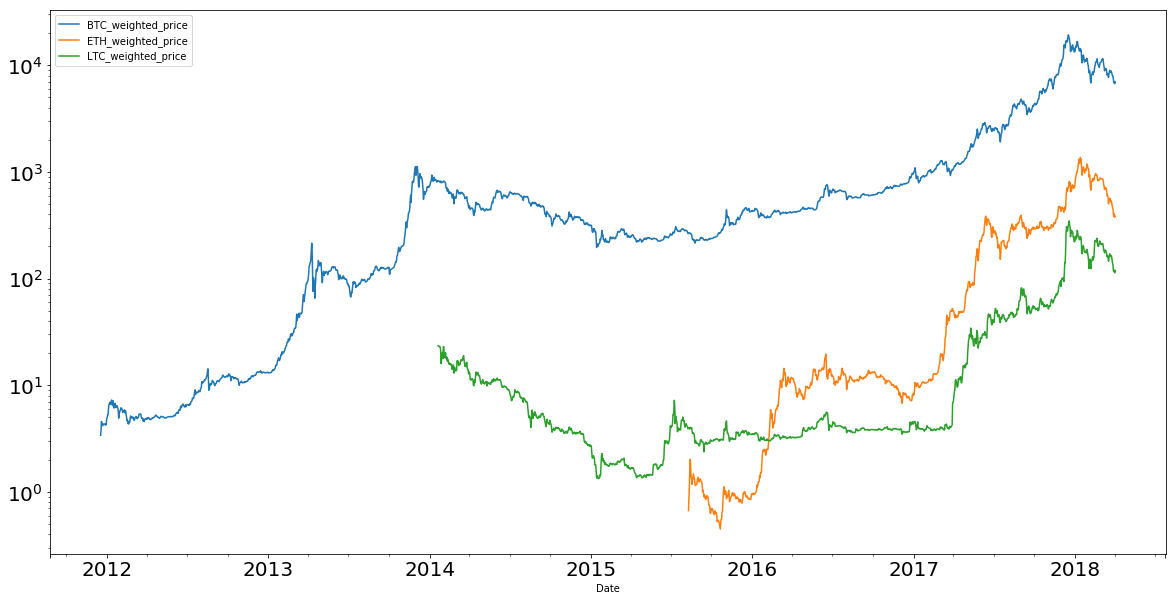

In [7]:
coins.filter(regex = "weighted_price").plot(figsize=(20,10), fontsize=20, logy=True)

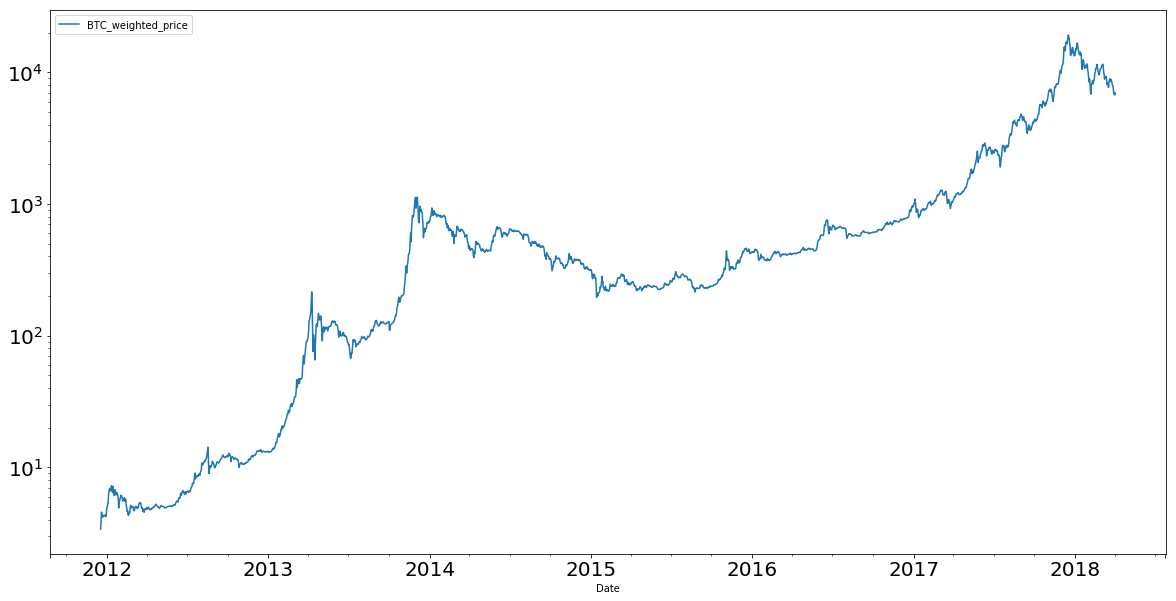

In [8]:
coins.filter(regex = "BTC_weighted_price").plot(figsize=(20,10), fontsize=20, logy=True).legend(loc = 2)

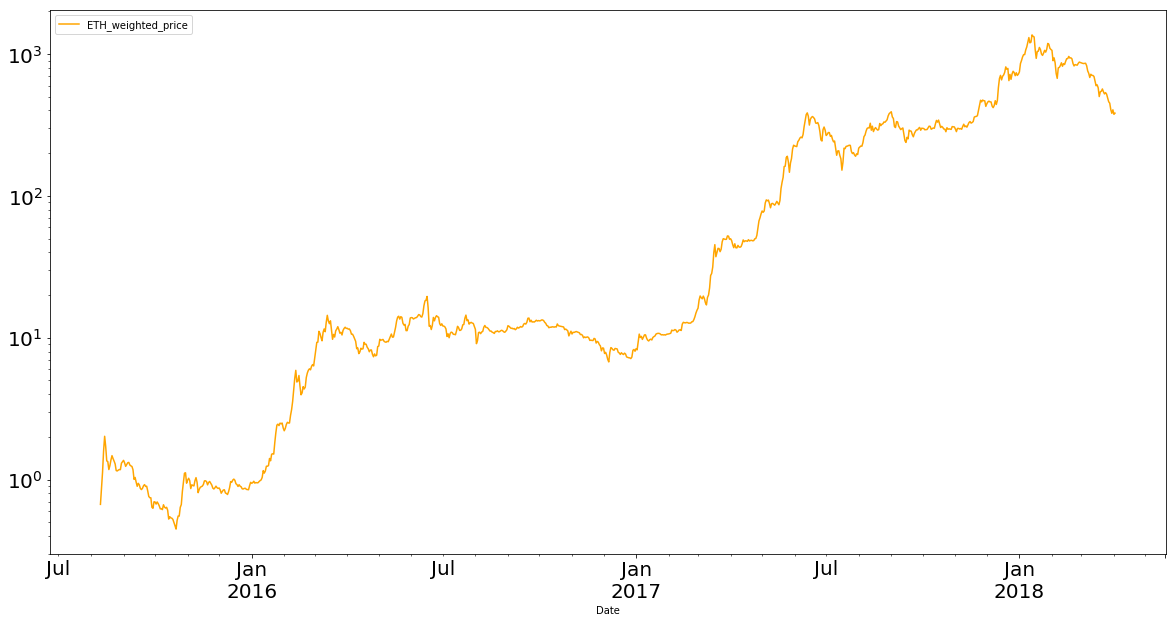

In [9]:
coins.filter(regex = "ETH_weighted_price").plot(figsize=(20,10), fontsize=20, color="orange", logy=True).legend(loc = 2)

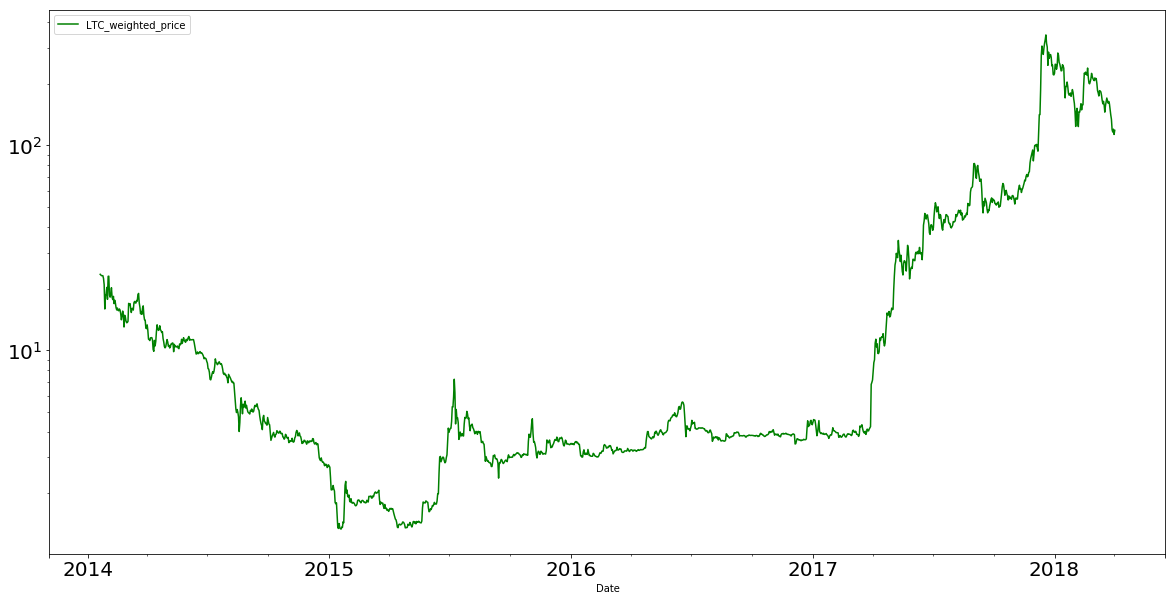

In [10]:
coins.filter(regex = "LTC_weighted_price").plot(figsize=(20,10), fontsize=20, color="green", logy=True).legend(loc = 2)

# Candlestick

1. Bitcoin
2. Ethereum
3. Litecoin

In [11]:
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

btc_ohlc = coins[['BTC_open', 'BTC_high', 'BTC_low', 'BTC_close']]

def cs_plot(btc_ohlc, title=''):
    btc_ohlc.reset_index(inplace=True)
    btc_ohlc["Date"] = btc_ohlc["Date"].map(mdates.date2num)

    fig = plt.figure(figsize=(20,10))
    f1 = plt.subplot2grid((1, 1), (0, 0))
    f1.xaxis_date()
    candlestick_ohlc(f1, btc_ohlc.values, width=0.5, colorup='g', colordown='#ff1717')

    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.title(title)
    return

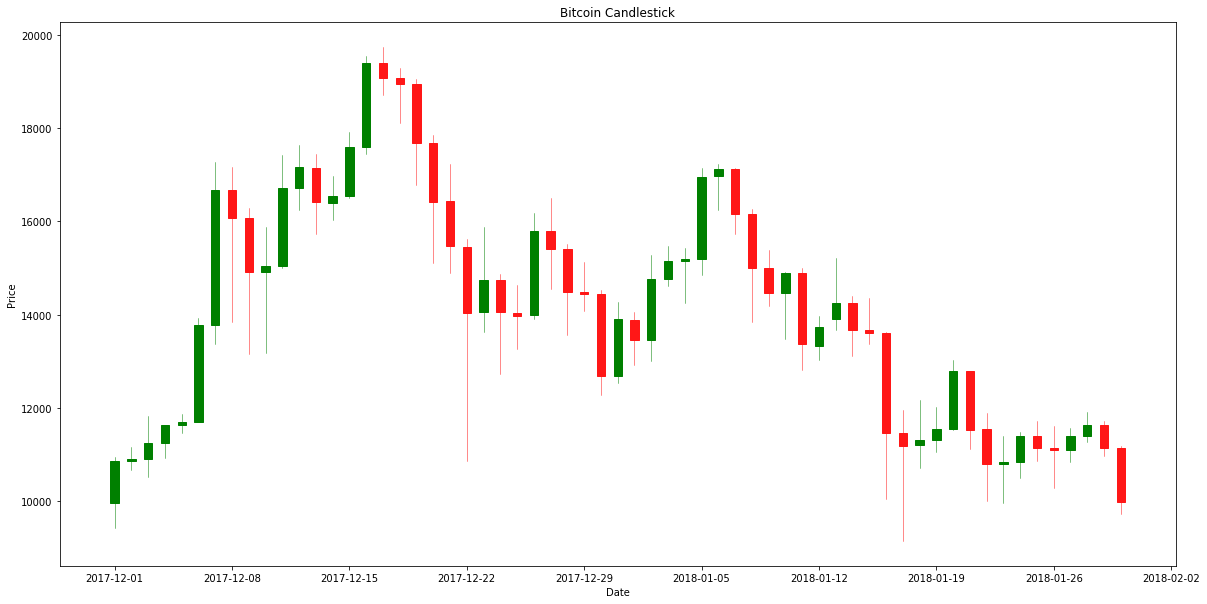

In [12]:
btc_ohlc = coins[['BTC_open', 'BTC_high', 'BTC_low', 'BTC_close']]
btc_ohlc = btc_ohlc.loc['20171201':'20180130']
cs_plot(btc_ohlc, title='Bitcoin Candlestick')

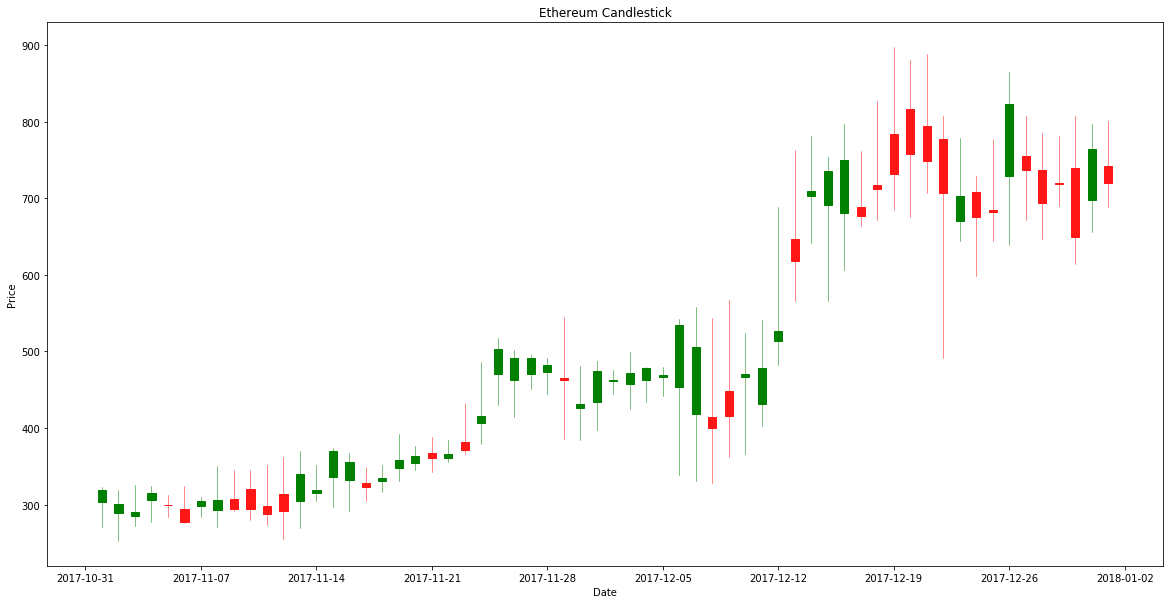

In [13]:
eth_ohlc = coins[['ETH_open', 'ETH_high', 'ETH_low', 'ETH_close']]

eth_ohlc = eth_ohlc.loc['20171101':'20180101']
cs_plot(eth_ohlc, title='Ethereum Candlestick')

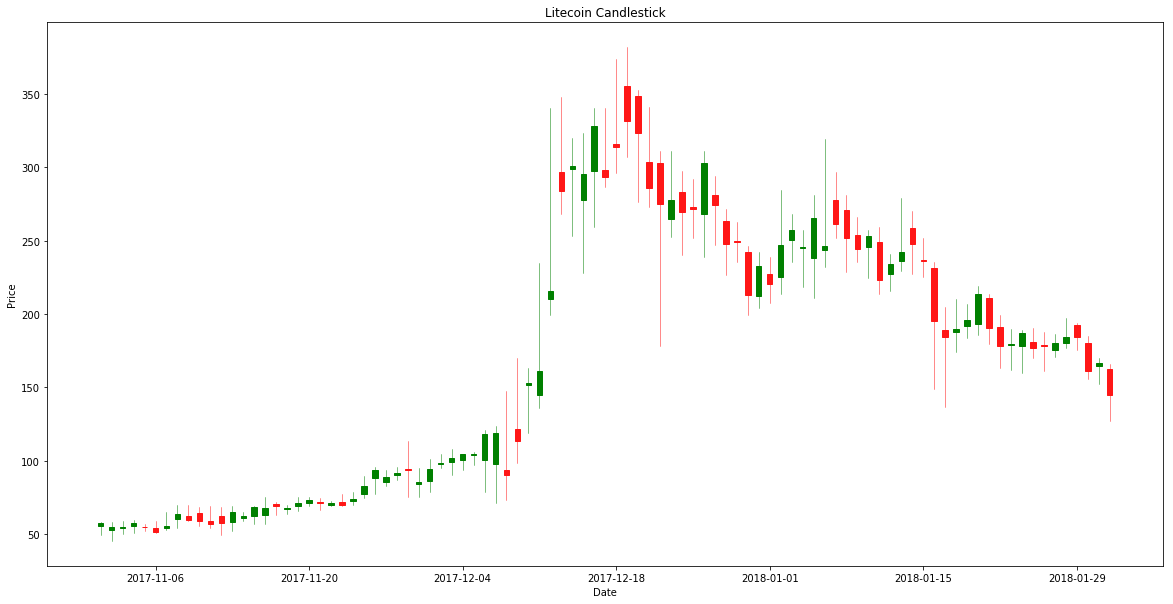

In [14]:
ltc_ohlc = coins[['LTC_open', 'LTC_high', 'LTC_low', 'LTC_close']]
ltc_ohlc = ltc_ohlc.loc['20171101':'20180201']

cs_plot(ltc_ohlc, title='Litecoin Candlestick')

# Identifying Trend Pattern

Plotting 12 months rolling average:

1. Bitcoin Rolling Mean & Standard Deviation
2. Ethereum Rolling Mean & Standard Deviation
3. Litecoin Rolling Mean & Standard Deviation

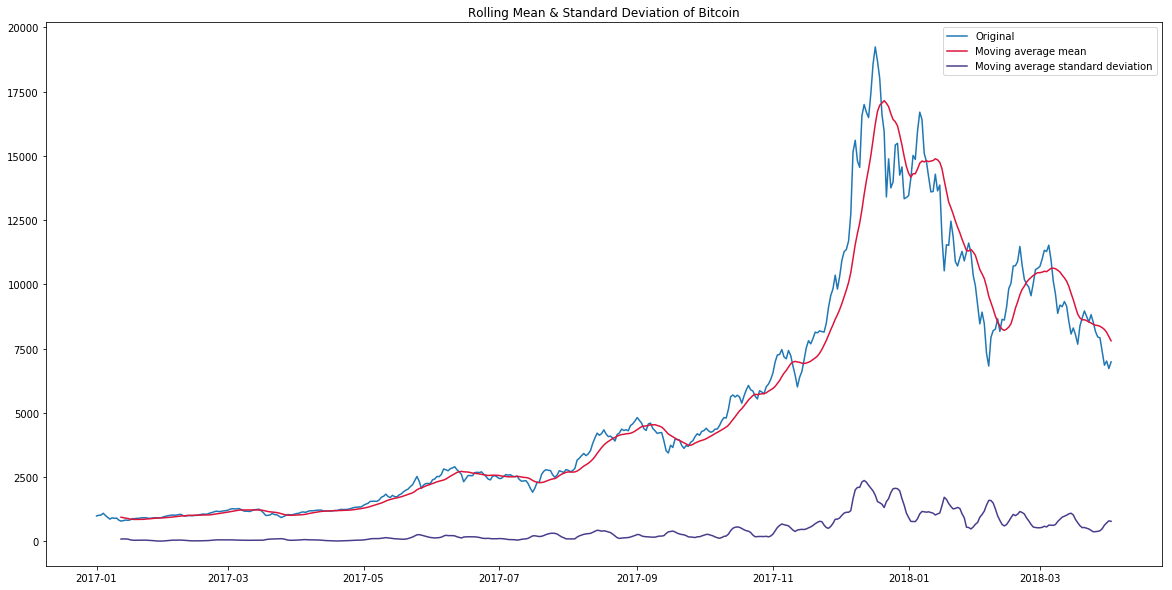

In [15]:
wp_btc = coins['BTC_weighted_price']
wp_btc = wp_btc['20170101':]

def plot_rolling_average(wp_btc, title='Rolling Mean & Standard Deviation of Bitcoin'):
   
    #calculate moving averages
    rolling_mean = wp_btc.rolling(window=12,center=False).mean()
    rolling_std = wp_btc.rolling(window=12,center=False).std()
    
    #plot statistics
    fig = plt.figure(figsize=(20,10))
    plt.plot(wp_btc, label='Original')
    plt.plot(rolling_mean, color='crimson', label='Moving average mean')
    plt.plot(rolling_std, color='darkslateblue', label='Moving average standard deviation')
    plt.legend(loc='best')
    plt.title(title)

plot_rolling_average(wp_btc)

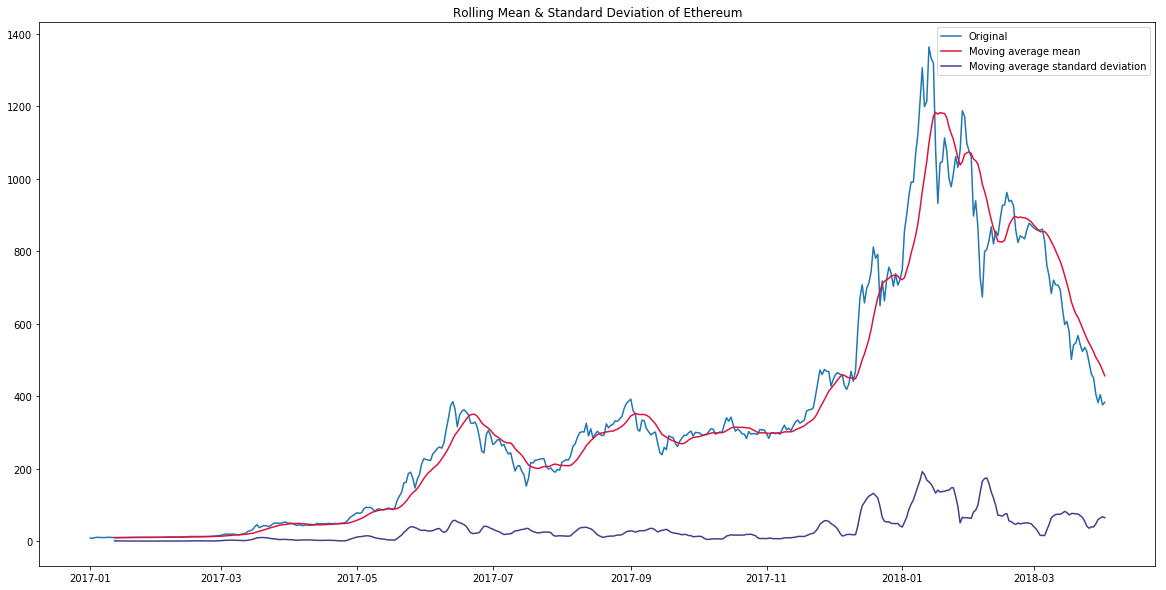

In [16]:
wp_eth = coins['ETH_weighted_price']
wp_eth = wp_eth['20170101':]

plot_rolling_average(wp_eth, title='Rolling Mean & Standard Deviation of Ethereum')

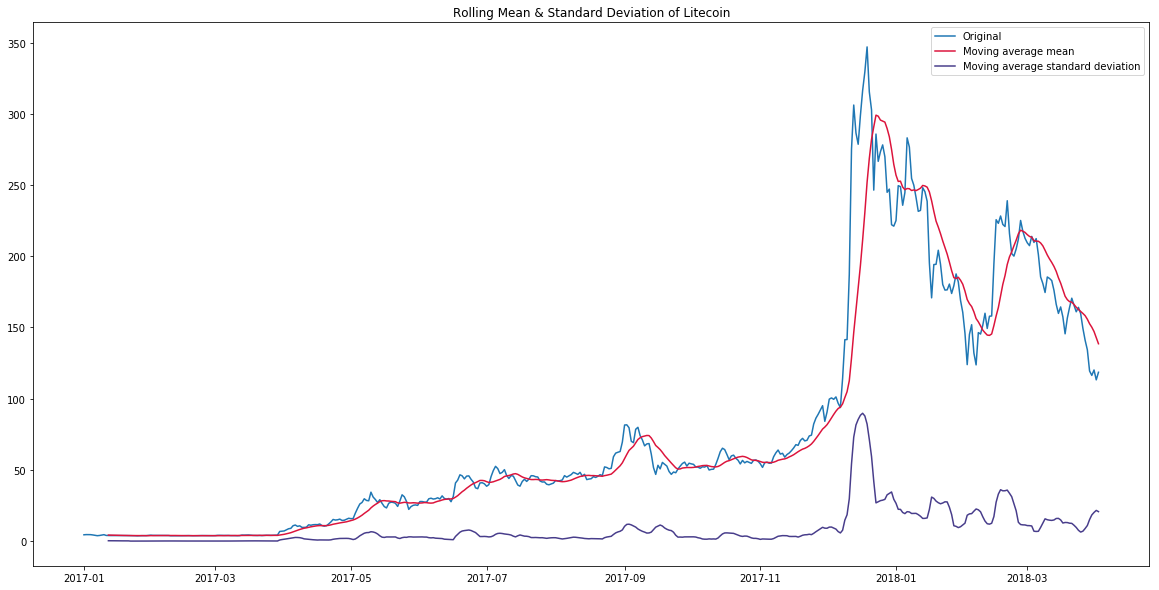

In [17]:
wp_ltc = coins['LTC_weighted_price']
wp_ltc = wp_ltc['20170101':]

plot_rolling_average(wp_ltc, title='Rolling Mean & Standard Deviation of Litecoin')

# Stationarity

Augmented Dickey-Fuller Test will be used to check for stationarity of the time-series

### Bitcoin Weighted Price

Hypothesis Testing  
H0: The time series is non-stationary  
H1: The time series is stationary

In [18]:
from statsmodels.tsa.stattools import adfuller, kpss

def test_stationarity(wp_btc):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(wp_btc, autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


test_stationarity(wp_btc)

Results of Dickey-Fuller Test:
Test Statistic                  -1.277154
p-value                          0.639559
#Lags Used                       1.000000
Number of Observations Used    455.000000
Critical Value (1%)             -3.444804
Critical Value (5%)             -2.867913
Critical Value (10%)            -2.570165
dtype: float64


As the p-value is greater than 0.05, we cannot reject null hypothesis, the series is not stationary

### Ethereum Weighted Price

In [19]:
test_stationarity(wp_eth)

Results of Dickey-Fuller Test:
Test Statistic                  -1.254761
p-value                          0.649607
#Lags Used                      12.000000
Number of Observations Used    444.000000
Critical Value (1%)             -3.445164
Critical Value (5%)             -2.868072
Critical Value (10%)            -2.570249
dtype: float64


As the p-value is greater than 0.05, we cannot reject null hypothesis, the series is not stationary

### Litecoin Weighted Price

In [20]:
test_stationarity(wp_ltc)

Results of Dickey-Fuller Test:
Test Statistic                  -1.464217
p-value                          0.551133
#Lags Used                      18.000000
Number of Observations Used    438.000000
Critical Value (1%)             -3.445368
Critical Value (5%)             -2.868161
Critical Value (10%)            -2.570297
dtype: float64


As the p-value is greater than 0.05, we cannot reject null hypothesis, the series is not stationary

# Eliminating Trend

From the preliminary plots, increasing and decreasing trends can be seen for all cryptocurrencies especially starting in 2017. 

Differencing method will be used to remove trend in the time-series. Seasonality cannot be identified in the time-series.

In differencing, first-order difference is applied to the weighted price to make the time-series stationary. Variance is made stationary by using log-transformation.

These methods will be applied to Bitcoin, Ethereum and Litecoin.

**ts_diagnostics** is a function created to monitor the progress in making the time-series stationary.

In [21]:
def ts_diagnostics(wp_btc, lags=None, title=''):
    
    if not isinstance(wp_btc, pd.Series):
        wp_btc = pd.Series(wp_btc)
        
    # weekly moving averages (5 day window because of workdays)
    rolling_mean = wp_btc.rolling(window=12,center=False).mean()
    rolling_std = wp_btc.rolling(window=12,center=False).std()
    
    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))
    
    # time series plot
    wp_btc.plot(ax=ts_ax)
    rolling_mean.plot(ax=ts_ax, color='crimson');
    rolling_std.plot(ax=ts_ax, color='darkslateblue');
    ts_ax.set_title(title, fontsize=24);
    
    # acf and pacf
    plot_acf(wp_btc, lags=lags, ax=acf_ax, alpha=0.5)
    plot_pacf(wp_btc, lags=lags, ax=pacf_ax, alpha=0.5) 
    
    # qq plot
    sm.qqplot(wp_btc, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Plot')
    
    # hist plot
    wp_btc.plot(ax=hist_ax, kind='hist', bins=25);
    hist_ax.set_title('Histogram');
    plt.tight_layout();
    plt.show()
    
    # perform Augmented Dickey Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(wp_btc, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return

# Differencing

1. First-Order Difference
2. Stationary in Variance
3. Log-Transformed First-Order
3. Second-Order Difference

## Bitcoin: First-Order Difference
Removing the trend from time-series using first order differencing.

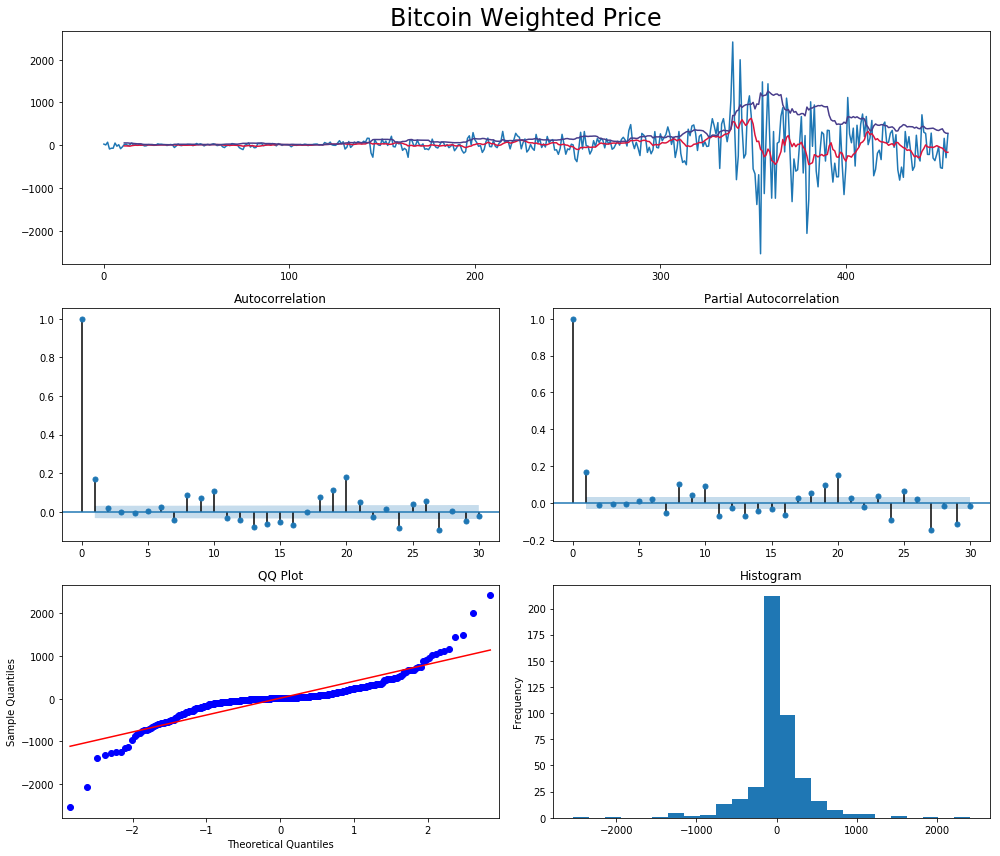

Results of Dickey-Fuller test:
test statistic         -1.793316e+01
p-value                 2.878340e-30
# of lags               0.000000e+00
# of observations       4.550000e+02
Critical Value (1%)    -3.444804e+00
Critical Value (5%)    -2.867913e+00
Critical Value (10%)   -2.570165e+00
dtype: float64


In [22]:
wp_btc_diff = np.diff(wp_btc)

ts_diagnostics(wp_btc_diff, lags=30, title='Bitcoin Weighted Price')

## Bitcoin: Stationary in Variance

Using log transformation to make the variance of the time-series stationary.

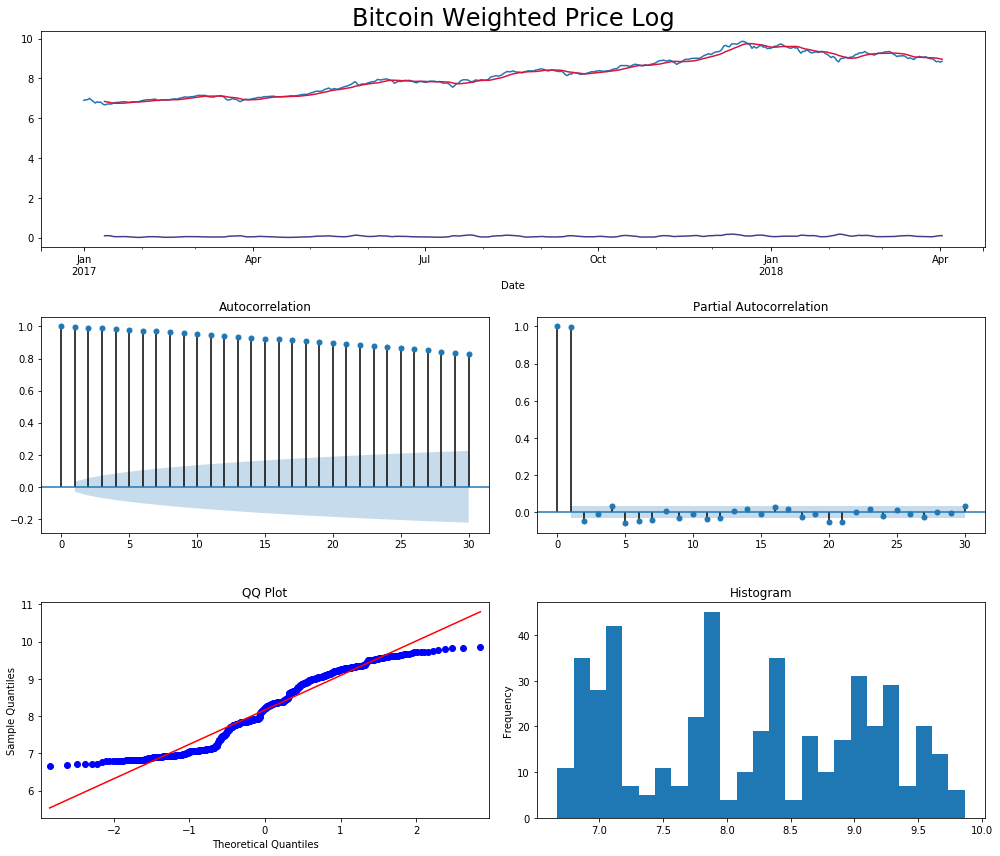

Results of Dickey-Fuller test:
test statistic           -1.128426
p-value                   0.703604
# of lags                 1.000000
# of observations       455.000000
Critical Value (1%)      -3.444804
Critical Value (5%)      -2.867913
Critical Value (10%)     -2.570165
dtype: float64


In [23]:
wp_btc_log = np.log(wp_btc)

ts_diagnostics(wp_btc_log, lags=30, title='Bitcoin Weighted Price Log')

## Bitcoin: Log-Transformed First-Order

Combining both techniques

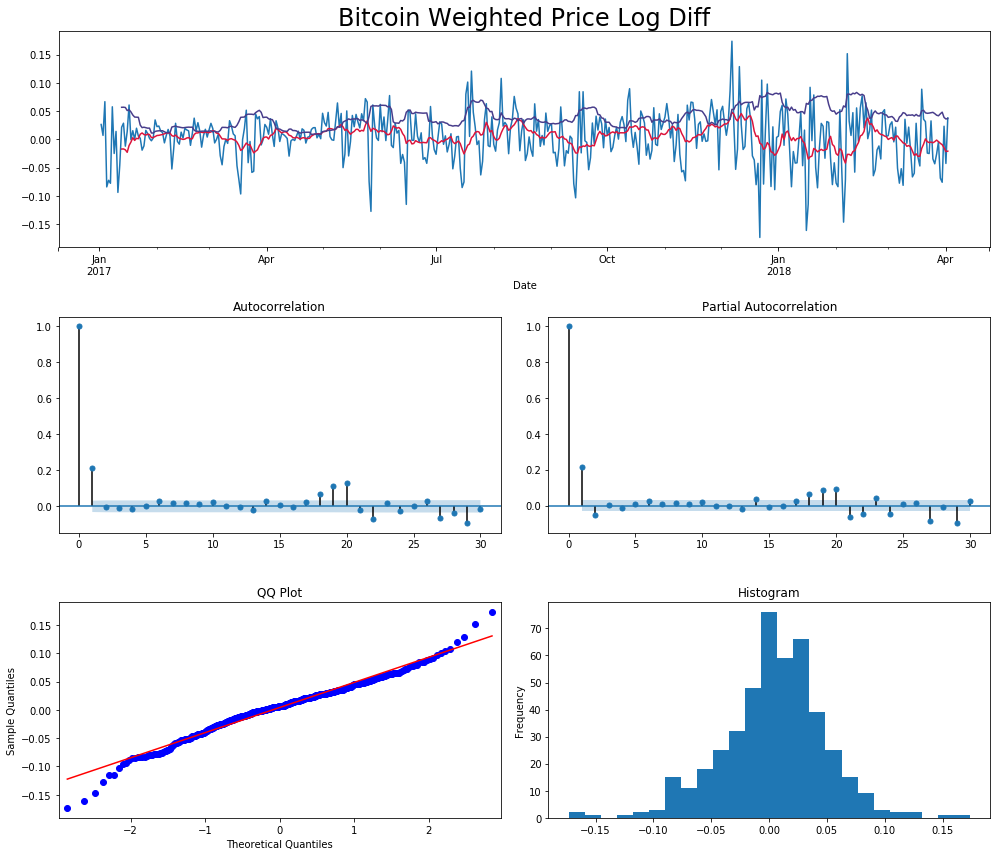

Results of Dickey-Fuller test:
test statistic         -1.711582e+01
p-value                 7.312851e-30
# of lags               0.000000e+00
# of observations       4.550000e+02
Critical Value (1%)    -3.444804e+00
Critical Value (5%)    -2.867913e+00
Critical Value (10%)   -2.570165e+00
dtype: float64


In [24]:
wp_btc_log_diff = np.log(wp_btc).diff().dropna()

ts_diagnostics(wp_btc_log_diff, lags=30, title='Bitcoin Weighted Price Log Diff')

## Ethereum: First-Order Difference
Removing the trend from time-series using first order differencing.

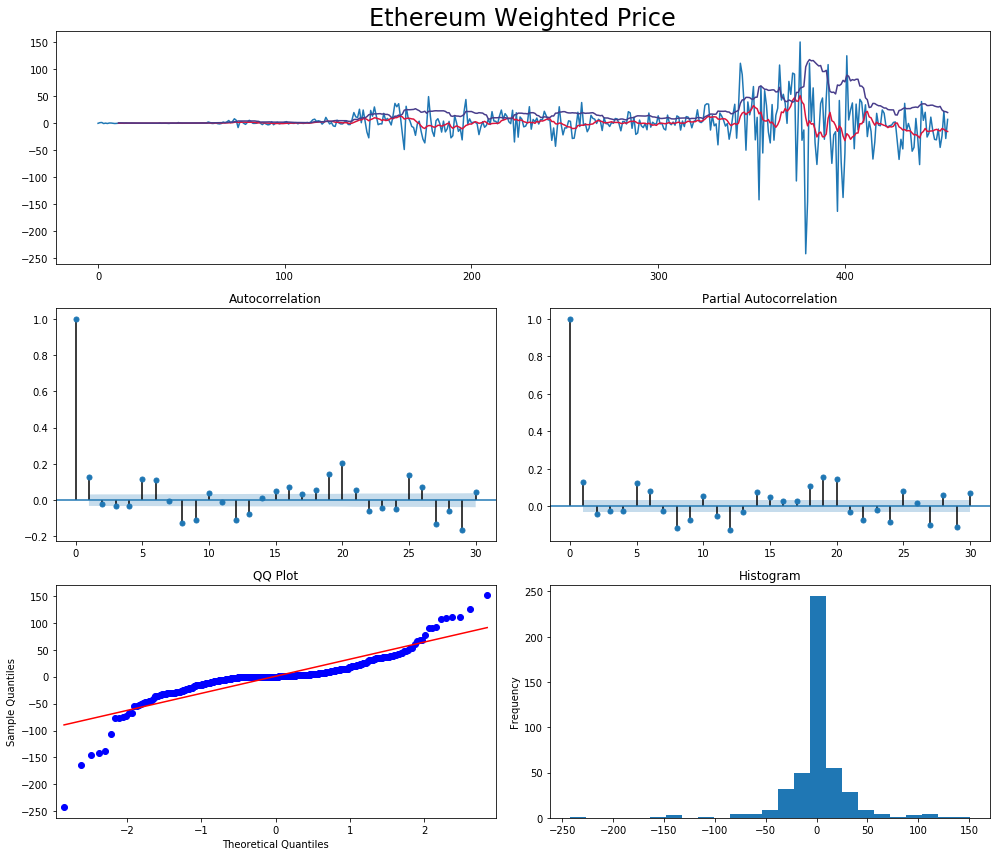

Results of Dickey-Fuller test:
test statistic           -3.414649
p-value                   0.010470
# of lags                18.000000
# of observations       437.000000
Critical Value (1%)      -3.445403
Critical Value (5%)      -2.868177
Critical Value (10%)     -2.570305
dtype: float64


In [28]:
wp_eth_diff = np.diff(wp_eth)

ts_diagnostics(wp_eth_diff, lags=30, title='Ethereum Weighted Price')

## Ethereum: Stationary in Variance

Using log transformation to make the variance of the time-series stationary.

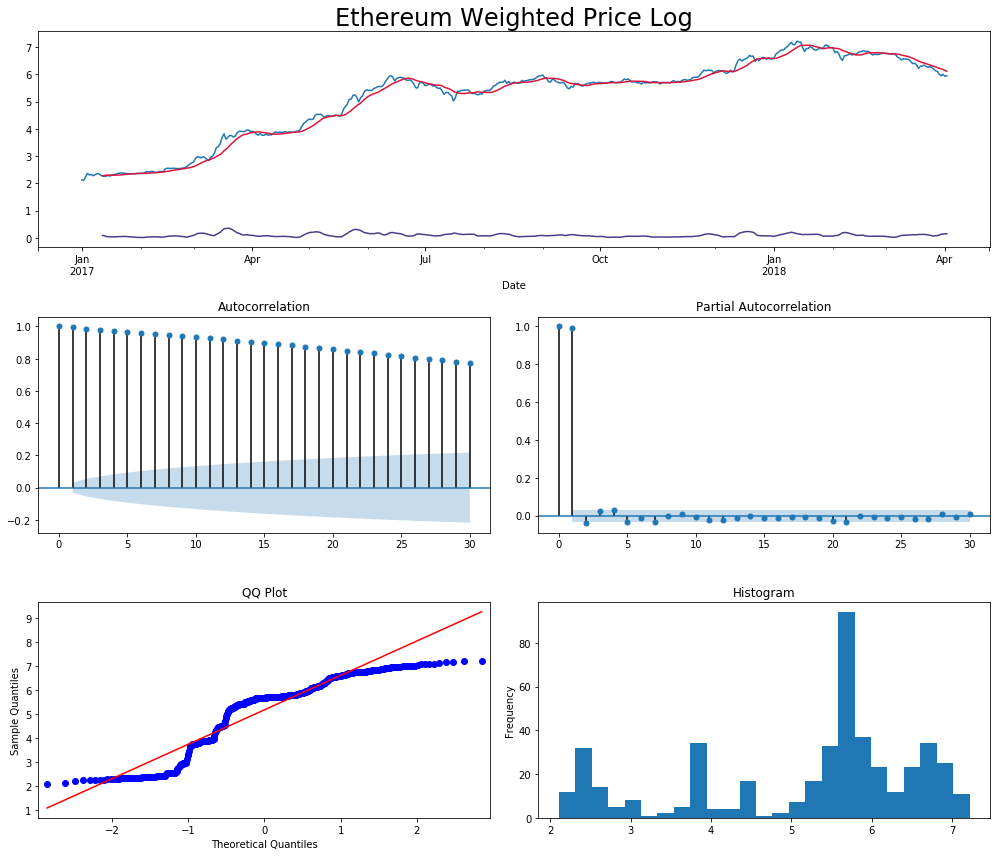

Results of Dickey-Fuller test:
test statistic           -2.515704
p-value                   0.111700
# of lags                 1.000000
# of observations       455.000000
Critical Value (1%)      -3.444804
Critical Value (5%)      -2.867913
Critical Value (10%)     -2.570165
dtype: float64


In [29]:
wp_eth_log = np.log(wp_eth)

ts_diagnostics(wp_eth_log, lags=30, title='Ethereum Weighted Price Log')

## Ethereum: Log-Transformed First-Order

Combining both techniques

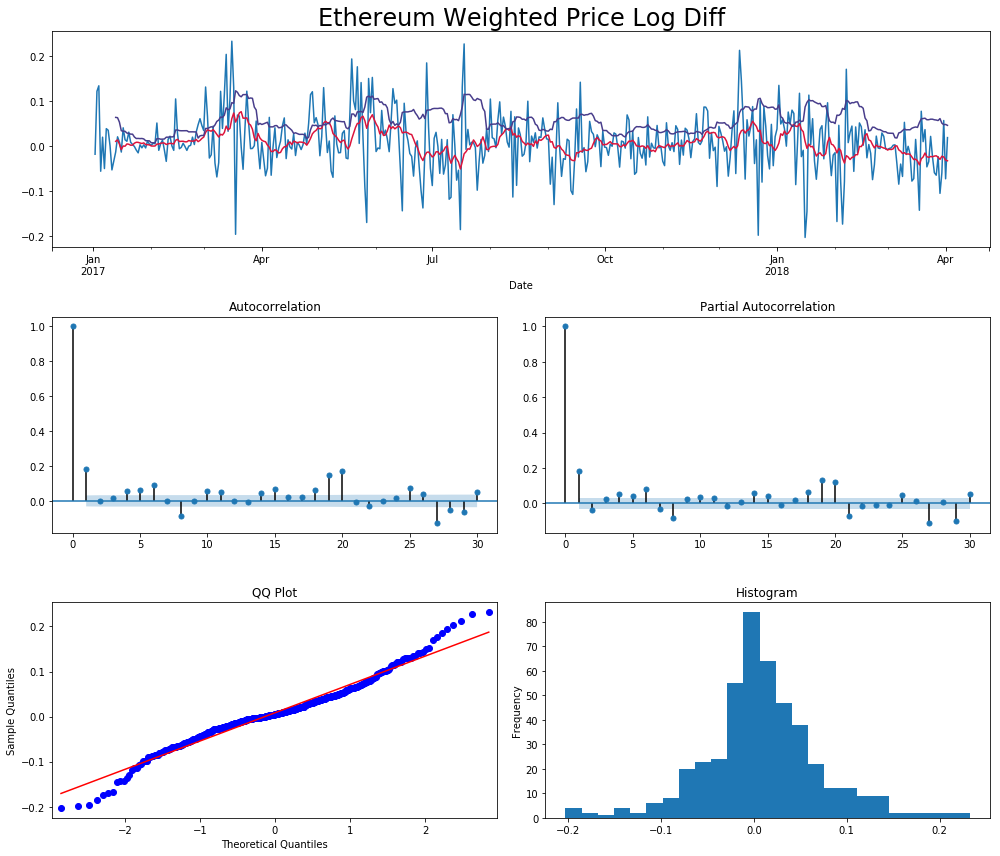

Results of Dickey-Fuller test:
test statistic         -1.765743e+01
p-value                 3.695674e-30
# of lags               0.000000e+00
# of observations       4.550000e+02
Critical Value (1%)    -3.444804e+00
Critical Value (5%)    -2.867913e+00
Critical Value (10%)   -2.570165e+00
dtype: float64


In [30]:
wp_eth_log_diff = np.log(wp_eth).diff().dropna()

ts_diagnostics(wp_eth_log_diff, lags=30, title='Ethereum Weighted Price Log Diff')

## Litecoin: First-Order Difference
Removing the trend from time-series using first order differencing.

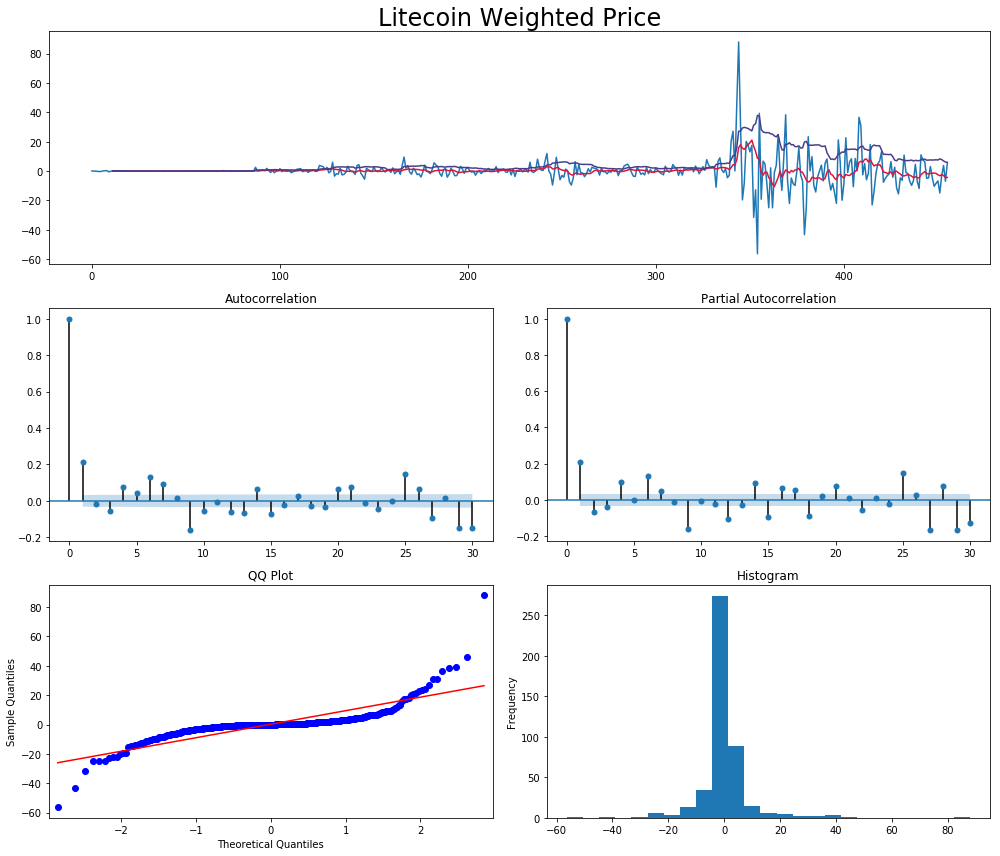

Results of Dickey-Fuller test:
test statistic           -5.183752
p-value                   0.000009
# of lags                17.000000
# of observations       438.000000
Critical Value (1%)      -3.445368
Critical Value (5%)      -2.868161
Critical Value (10%)     -2.570297
dtype: float64


In [33]:
wp_ltc_diff = np.diff(wp_ltc)

ts_diagnostics(wp_ltc_diff, lags=30, title='Litecoin Weighted Price')

In [1]:
# library used for analysis and plotting in R
library(tseries)
library(forecast)

# load cryptocurrency data
coins <- read.csv('https://raw.githubusercontent.com/azmirfakkri/datascience-projects/master/coins.csv', header=TRUE)
rbtc <- coins["BTC_weighted_price"]
btc <- as.ts(rbtc)

reth <- coins["ETH_weighted_price"]
eth <- as.ts(reth)

rltc <- coins["LTC_weighted_price"]
ltc <- as.ts(rltc)

# Find Optimised Model for Bitcoin

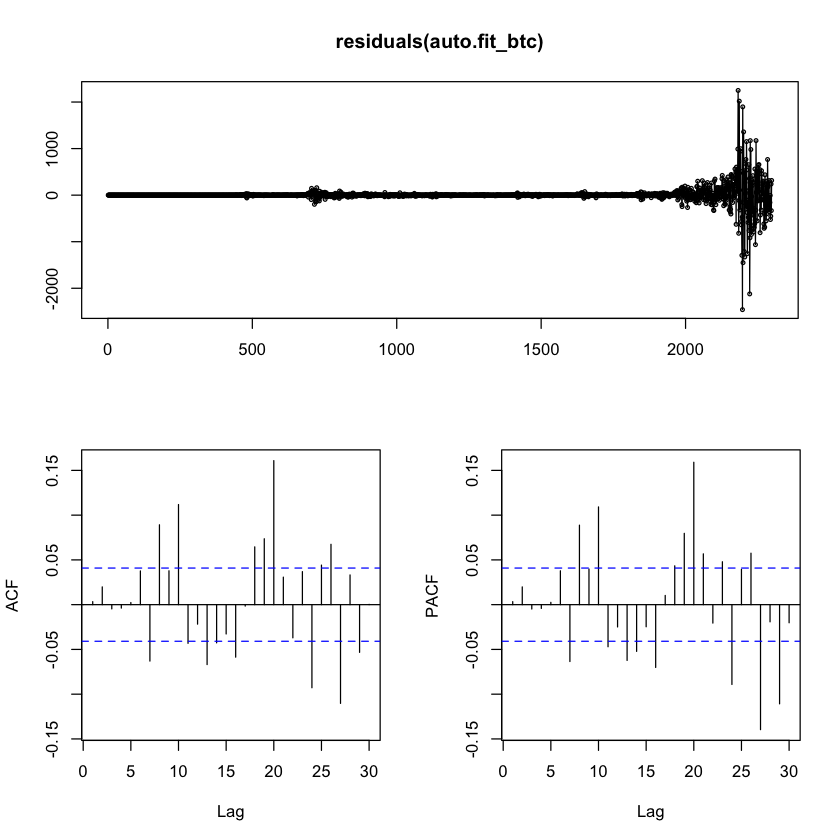

In [3]:
# automatic way to find the optimized model
auto.fit_btc <- auto.arima(btc, seasonal=F)
tsdisplay(residuals(auto.fit_btc), lag.max=30)

# Summary of the Optimised Model for Bitcoin

In [4]:
auto.fit_btc <- auto.arima(btc, seasonal=F)
summary(auto.fit_btc)

Series: btc 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.1684
s.e.  0.0202

sigma^2 estimated as 30365:  log likelihood=-15112.55
AIC=30229.11   AICc=30229.11   BIC=30240.58

Training set error measures:
                 ME     RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 2.6195 174.1809 47.15659 0.2104585 2.553851 0.9707807 0.003357247


# Prediction for Bitcoin (10 Steps Ahead)

In [5]:
auto.fcast_btc <- forecast(auto.fit_btc, h=10)
auto.fcast_btc

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2299       7036.451 6813.132 7259.770 6694.914 7377.988
2300       7036.451 6693.015 7379.888 6511.210 7561.692
2301       7036.451 6605.144 7467.759 6376.824 7696.079
2302       7036.451 6532.365 7540.538 6265.518 7807.385
2303       7036.451 6468.842 7604.061 6168.368 7904.535
2304       7036.451 6411.745 7661.157 6081.046 7991.857
2305       7036.451 6359.447 7713.456 6001.062 8071.840
2306       7036.451 6310.909 7761.994 5926.829 8146.073
2307       7036.451 6265.420 7807.483 5857.260 8215.642
2308       7036.451 6222.469 7850.433 5791.573 8281.329

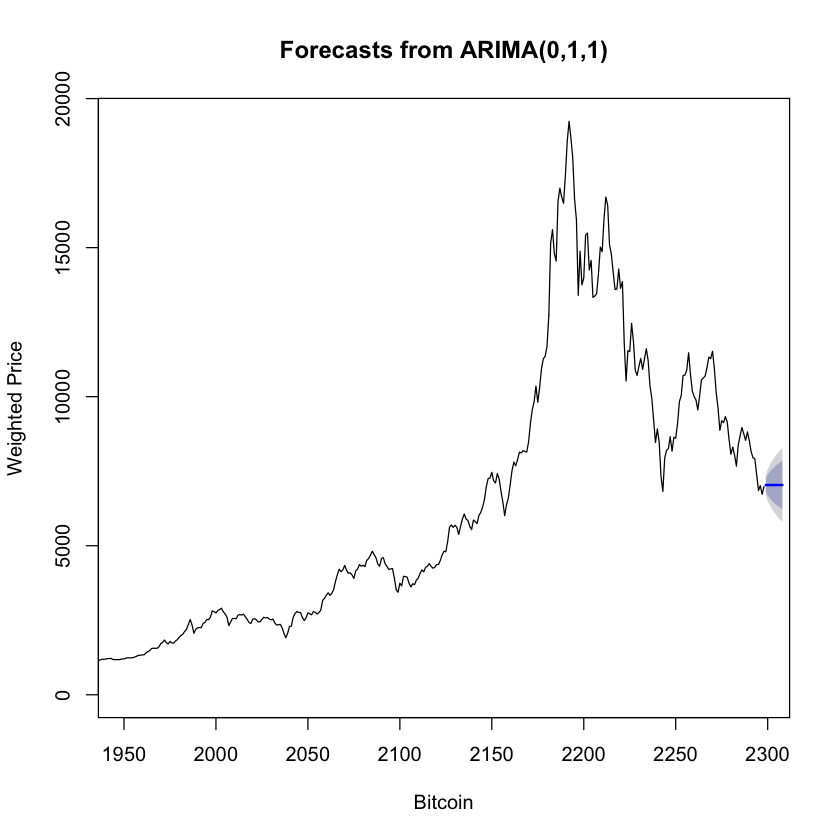

In [6]:
plot(auto.fcast_btc, ylab = "Weighted Price", xlab = "Bitcoin", xlim = c(1950, 2298))

# Find Optimised Model for Ethereum

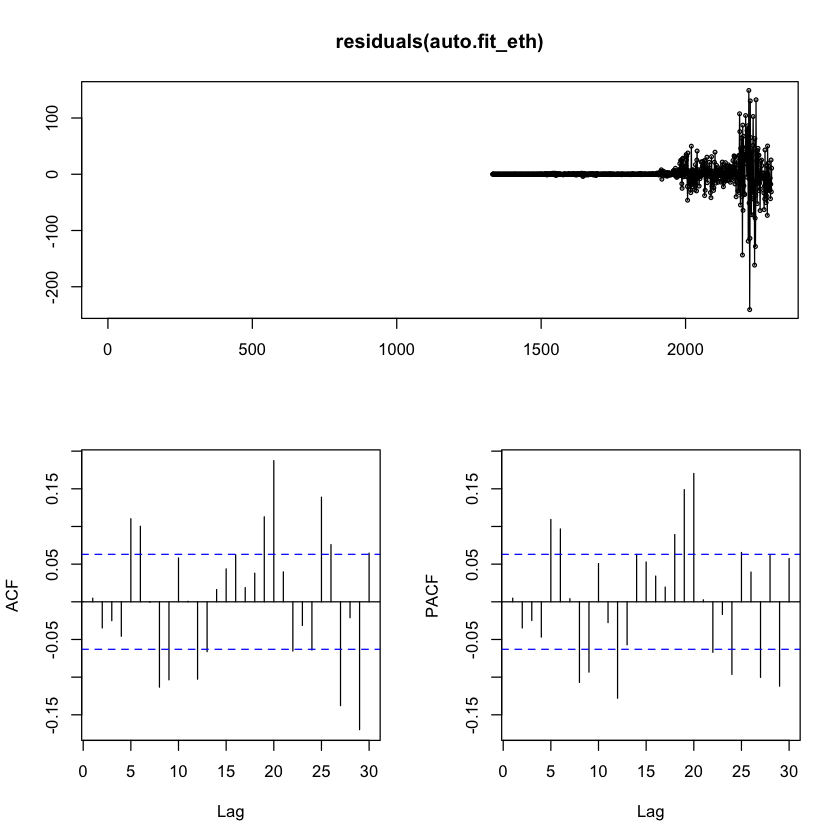

In [7]:
# automatic way to find the optimized model
auto.fit_eth <- auto.arima(eth, seasonal=F)
tsdisplay(residuals(auto.fit_eth), lag.max=30)

# Summary of the Optimised Model for Ethereum

In [8]:
summary(auto.fit_eth)

Series: eth 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.1296
s.e.  0.0319

sigma^2 estimated as 196.4:  log likelihood=-4339.26
AIC=8682.51   AICc=8682.52   BIC=8693.99

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3452449 21.59624 8.045154 0.4019672 4.384136 0.9953082
                    ACF1
Training set 0.004827001


# Prediction for Ethereum (10 Steps Ahead)

In [9]:
auto.fcast_eth <- forecast(auto.fit_eth, h=10)
auto.fcast_eth

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2299       384.0815 366.1201 402.0430 356.6119 411.5512
2300       384.2012 357.1042 411.2982 342.7599 425.6425
2301       384.2167 350.1843 418.2492 332.1686 436.2648
2302       384.2187 344.4220 424.0154 323.3549 445.0825
2303       384.2190 339.3909 429.0471 315.6604 452.7776
2304       384.2190 334.8696 433.5684 308.7457 459.6924
2305       384.2190 330.7291 437.7089 302.4133 466.0248
2306       384.2190 326.8868 441.5512 296.5370 471.9011
2307       384.2190 323.2863 445.1517 291.0305 477.4075
2308       384.2190 319.8871 448.5510 285.8318 482.6063

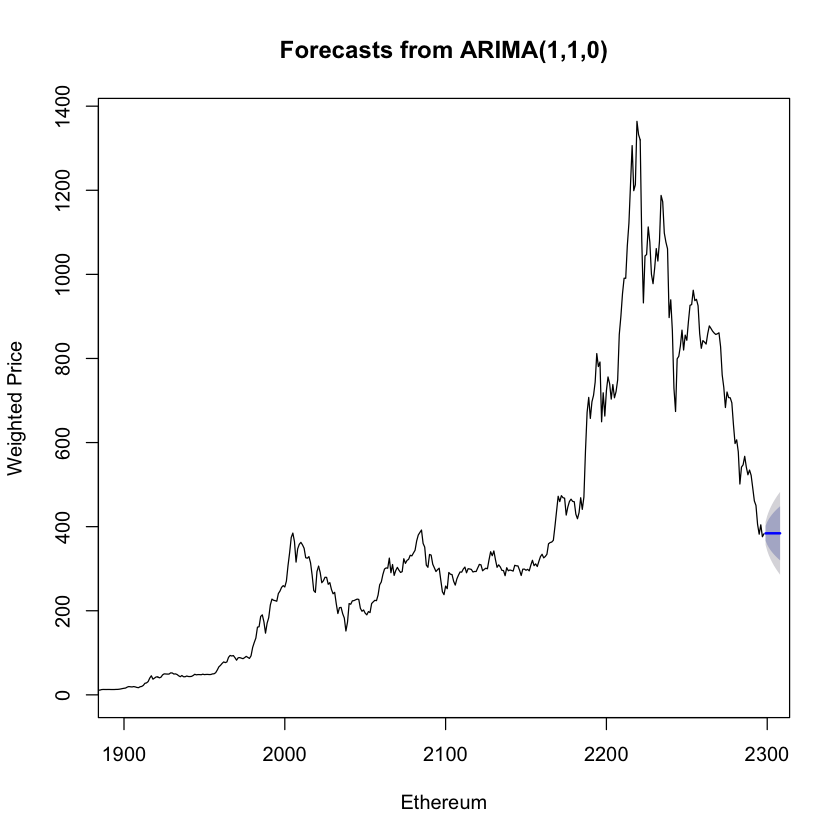

In [10]:
plot(auto.fcast_eth, ylab = "Weighted Price", xlab = "Ethereum", xlim = c(1900, 2298))

# Find Optimised Model for Litecoin

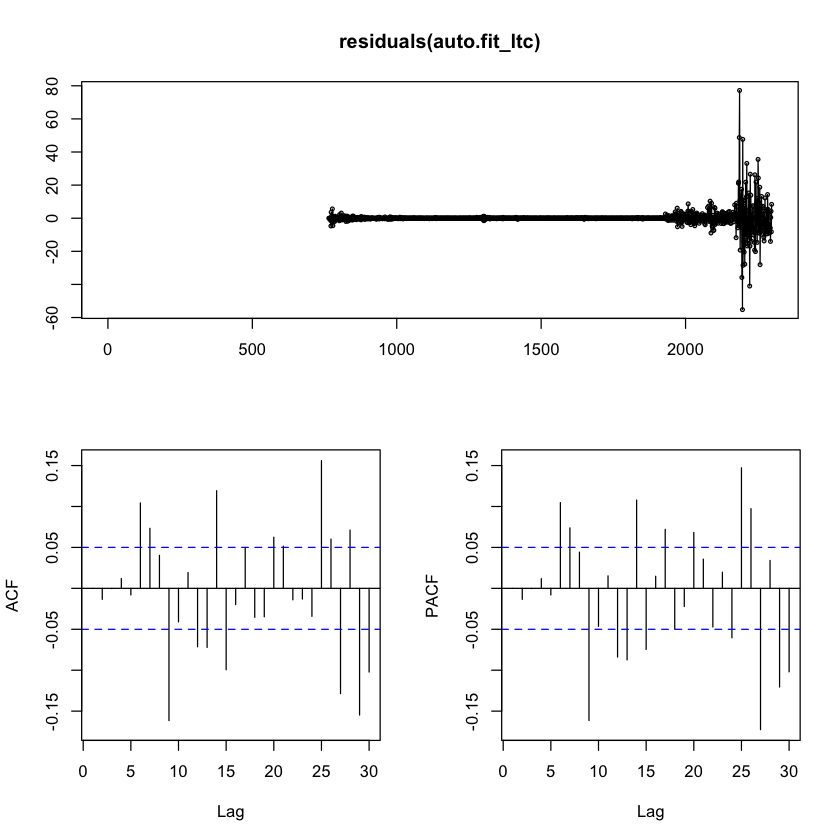

In [12]:
# automatic way to find the optimized model
auto.fit_ltc <- auto.arima(ltc, seasonal=F)
tsdisplay(residuals(auto.fit_ltc), lag.max=30)

# Summary of the Optimised Model for Litecoin

In [13]:
summary(auto.fit_ltc)

Series: ltc 
ARIMA(4,1,0) 

Coefficients:
         ar1      ar2      ar3     ar4
      0.2253  -0.0502  -0.0626  0.1020
s.e.  0.0254   0.0260   0.0260  0.0254

sigma^2 estimated as 15.93:  log likelihood=-4605.49
AIC=9220.98   AICc=9221.01   BIC=9249.68

Training set error measures:
                     ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.04936746 4.878988 1.377328 -0.01948739 3.276953 0.9917904
                     ACF1
Training set 1.586774e-06


# Prediction for Litecoin (10 Steps Ahead)

In [14]:
auto.fcast_ltc <- forecast(auto.fit_ltc, h=10)
auto.fcast_ltc

     Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
2299       119.5198 114.4056 124.6340 111.69834 127.3413
2300       120.2971 112.2085 128.3857 107.92666 132.6676
2301       119.3843 109.1503 129.6182 103.73278 135.0358
2302       119.6196 107.8104 131.4287 101.55904 137.6801
2303       119.7709 106.4067 133.1352  99.33214 140.2097
2304       119.9296 105.0794 134.7798  97.21819 142.6410
2305       119.8500 103.6275 136.0724  95.03991 144.6600
2306       119.8386 102.3735 137.3036  93.12809 146.5491
2307       119.8455 101.2181 138.4730  91.35727 148.3338
2308       119.8688 100.1396 139.5980  89.69560 150.0420

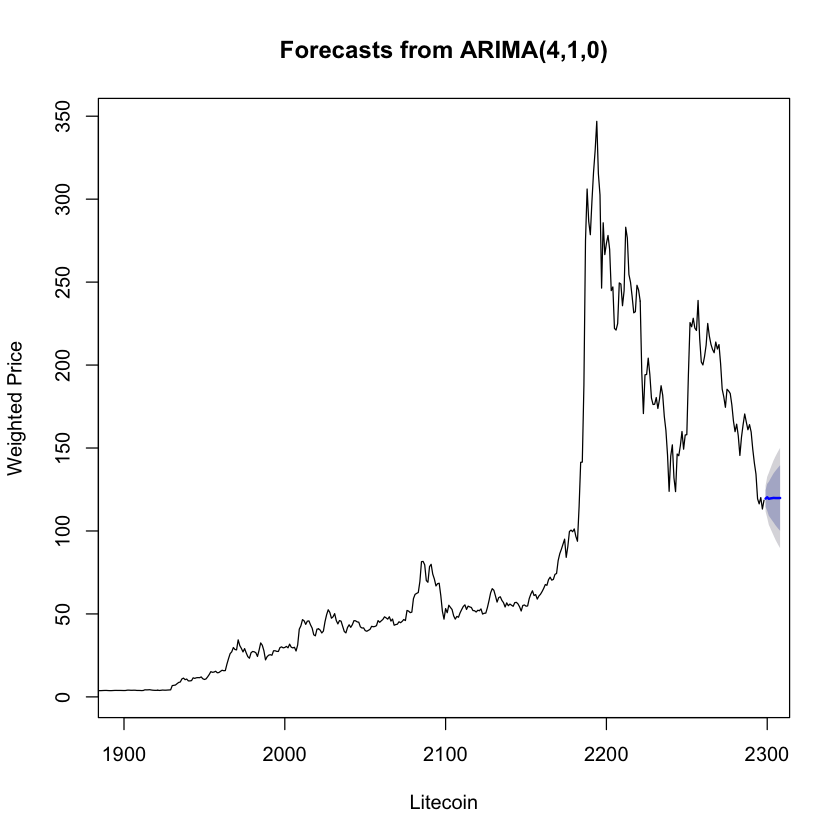

In [15]:
plot(auto.fcast_ltc, ylab = "Weighted Price", xlab = "Litecoin", xlim = c(1900, 2298))

# Correlation between Sentiment Analysis and Cryptocurrencies Weighted Price

In [69]:
sentiment = pd.read_csv("/Users/azmirfakkri/Downloads/aggregatedSentimentBYCOIN", index_col = 'Date')
sentiment.index = pd.to_datetime(sentiment.index)

In [70]:
sentiment.head()

,BTC_aggregated_sentiment,BTC_weighted_price,BTC_volume,ETH_aggregated_sentiment,ETH_weighted_price,ETH_volume,LTC_aggregated_sentiment,LTC_weighted_price,LTC_volume
Date,,,,,,,,,
2018-02-21,0.699115,10759.218428,17103.174314,0.782258,858.995126,2609.443157,0.706081,215.929875,1032.398110
2018-02-22,0.711783,10195.901888,16669.585884,0.760204,824.134342,1681.500236,0.726923,201.866520,727.093563
2018-02-23,0.628253,10008.254193,13160.441551,0.658730,842.500343,2597.422687,0.649123,200.057195,1023.286141
2018-02-24,0.646965,9892.751445,11414.323735,0.718310,838.896617,2582.404513,0.685185,205.015996,792.773865
2018-02-25,0.655052,9556.268502,8036.557039,0.706667,834.247046,1553.127040,0.768072,211.936343,1232.479401


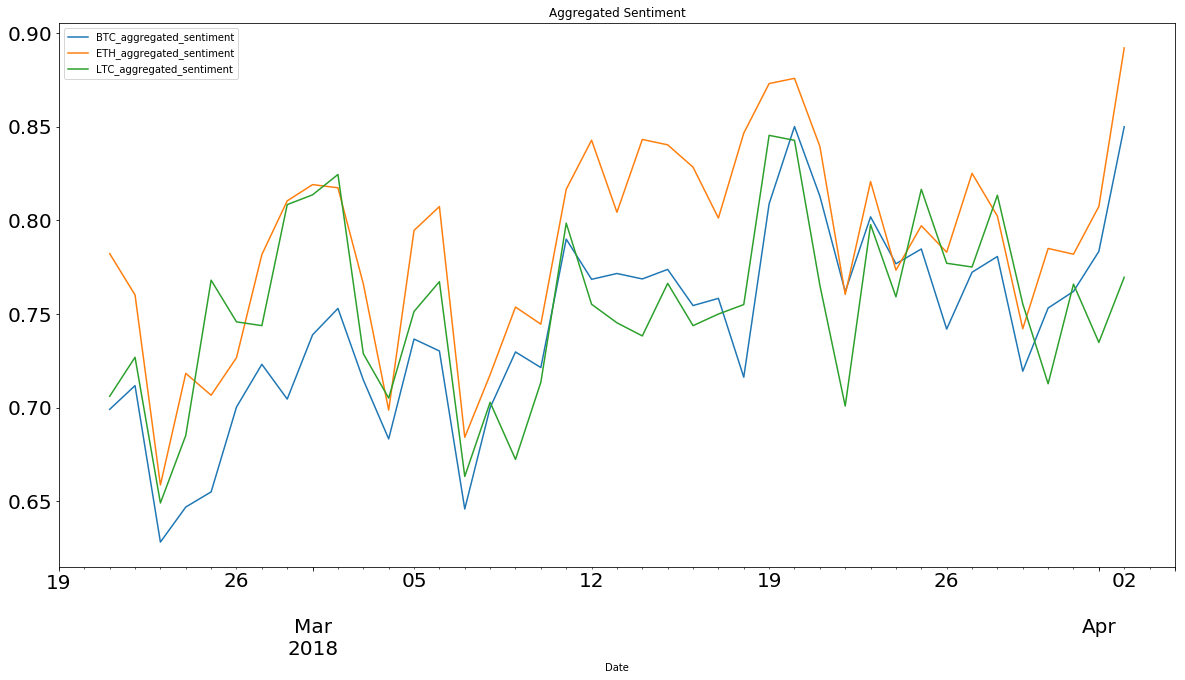

In [71]:
sentiment.filter(regex = "aggregated_sentiment").plot(figsize=(20,10), fontsize=20, title='Aggregated Sentiment')

In [80]:
sentiment_o = pd.read_csv("/Users/azmirfakkri/Downloads/aggregatedSentimentOVERALL", index_col = 'date')
sentiment_o.index = pd.to_datetime(sentiment_o.index)

In [82]:
cols = list(sentiment_o.columns)
cols.remove('Unnamed: 0')
cols.remove('OVERALL_volume')

for col in cols:
    col_zscore = col + '_zscore'
    sentiment_o[col_zscore] = (sentiment_o[col] - sentiment_o[col].mean())/sentiment_o[col].std(ddof=0)

In [83]:
sentiment_o.head()

,Unnamed: 0,OVERALL_aggregated_sentiment,OVERALL_weighted_price,OVERALL_volume,OVERALL_aggregated_sentiment_zscore,OVERALL_weighted_price_zscore
date,,,,,,
2018-02-21,0,0.718266,4027.885454,6957.396575,-0.853219,-0.589554
2018-02-22,1,0.724702,4962.445913,8315.597198,-0.718093,0.414344
2018-02-23,2,0.636247,7086.635372,9671.269194,-2.575207,2.696131
2018-02-24,3,0.663242,7230.739100,8673.159448,-2.008446,2.850926
2018-02-25,4,0.697917,5379.543601,4976.454505,-1.280456,0.862387


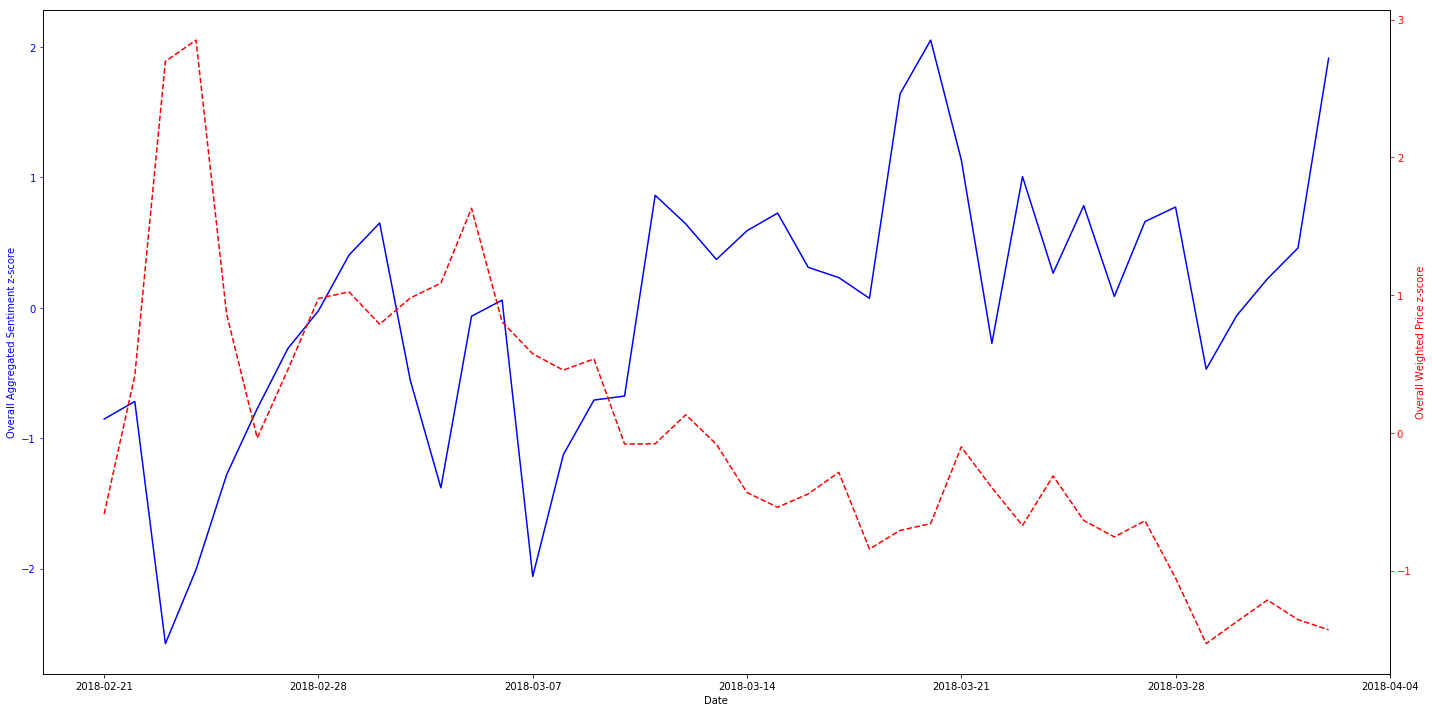

In [84]:
oasz = sentiment_o["OVERALL_aggregated_sentiment_zscore"]
owpz = sentiment_o["OVERALL_weighted_price_zscore"]

fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xlabel('Date')
ax1.plot(ymd, oasz, 'b-')
ax1.set_ylabel('Overall Aggregated Sentiment z-score', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(ymd, owpz, 'r--')
ax2.set_ylabel('Overall Weighted Price z-score', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

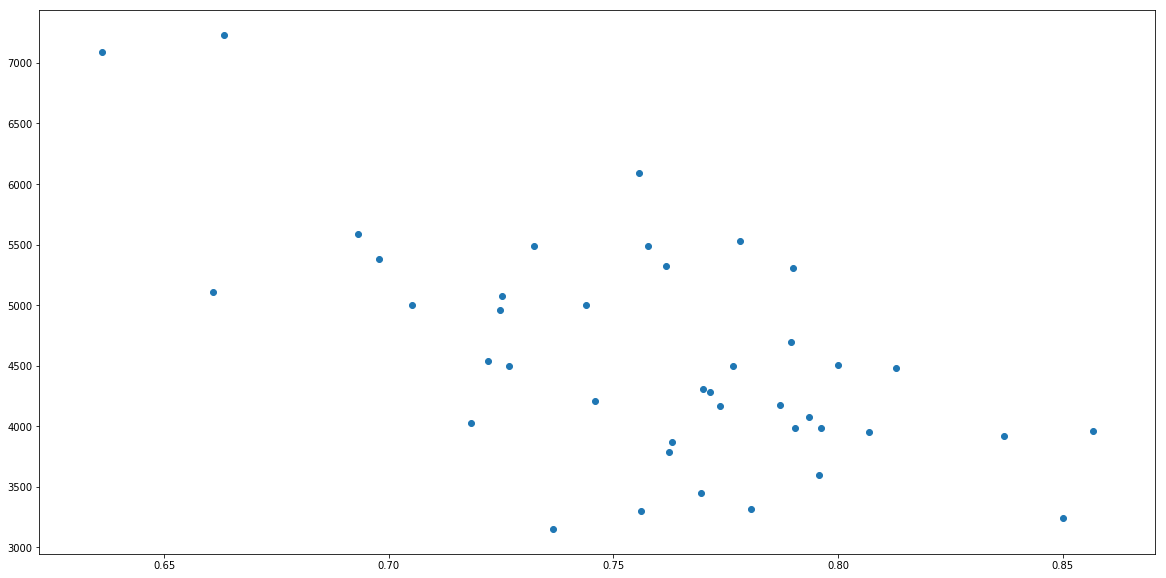

In [91]:
plt.figure(figsize=(20, 10))
plt.scatter(oas, owp)

In [87]:
# correlation between overall aggregated sentiment and overall weighted price 
np.corrcoef(oas, owp)

array([[ 1.        , -0.62780622],
       [-0.62780622,  1.        ]])

# Granger Causality

In [89]:
from statsmodels.tsa.stattools import grangercausalitytests

data = np.asarray(sentiment_o[['OVERALL_aggregated_sentiment', 'OVERALL_weighted_price']])
grangercausalitytests(data, 5, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8171  , p=0.0345  , df_denom=37, df_num=1
ssr based chi2 test:   chi2=5.2077  , p=0.0225  , df=1
likelihood ratio test: chi2=4.8955  , p=0.0269  , df=1
parameter F test:         F=4.8171  , p=0.0345  , df_denom=37, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7365  , p=0.0791  , df_denom=34, df_num=2
ssr based chi2 test:   chi2=6.2778  , p=0.0433  , df=2
likelihood ratio test: chi2=5.8209  , p=0.0545  , df=2
parameter F test:         F=2.7365  , p=0.0791  , df_denom=34, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6463  , p=0.0664  , df_denom=31, df_num=3
ssr based chi2 test:   chi2=9.7317  , p=0.0210  , df=3
likelihood ratio test: chi2=8.6643  , p=0.0341  , df=3
parameter F test:         F=2.6463  , p=0.0664  , df_denom=31, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3213  , p=0.0814  , df_d

{1: ({'lrtest': (4.895531012091908, 0.026926291482511029, 1),
   'params_ftest': (4.8171351749531404, 0.034531053681811301, 37.0, 1),
   'ssr_chi2test': (5.2077137026520699, 0.022486886429474984, 1),
   'ssr_ftest': (4.8171351749531652, 0.034531053681810753, 37.0, 1)},
   array([[ 0.,  1.,  0.]])]),
 2: ({'lrtest': (5.8209335156674058, 0.054450308828723142, 2),
   'params_ftest': (2.7364671636193014, 0.079077254925527043, 34.0, 2),
   'ssr_chi2test': (6.2777776109237973, 0.043330920242277568, 2),
   'ssr_ftest': (2.7364671637360143, 0.079077254917577278, 34.0, 2)},
   array([[ 0.,  0.,  1.,  0.,  0.],
          [ 0.,  0.,  0.,  1.,  0.]])]),
 3: ({'lrtest': (8.6643321993784639, 0.03410327340453085, 3),
   'params_ftest': (2.64632849828293, 0.066417755119924912, 31.0, 3),
   'ssr_chi2test': (9.7316596390173924, 0.020990408216499546, 3),
   'ssr_ftest': (2.6463284983292903, 0.066417755116606483, 31.0, 3)},
   array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  1.,

**Hypothesis Testing**

H0: Overall sentiment does not Granger-cause overall weighted price or the other way  
HA: Overall sentiment does Granger-cause overall weighted price or the other way

With lag value of 1, the p-value is less than 0.05, so we can reject the null hypothesis and accept alternative hypothesis. 